In [34]:
import pandas as pd
import numpy as np
import os, glob
import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csvPath = "C:/Users/20171965/Documents/Study Data Science/Year 3/Data Challenge 3/Data/sewer_data/data_pump/RG8150/RG8150/"

In [37]:
dfs = []
start = time.time()
for file in os.listdir(csvPath):
    with open(csvPath +'/'+ file) as f:
        data = f.read().split('\n')
        dfs.append(pd.DataFrame(data=[line.split(';')[0:5] for line in data[1:]], columns=data[0].split(';')[0:5])[:-1])
        #[line.split(',') for line in data[1:]]
        #print(file)
        #print(data[0].split(','))
        #print(data[0].split(';')[0:5])
df = pd.concat(dfs, axis=0, ignore_index=True)
print("Length of dataframe:",len(df))
print("number of rows with bad data:", len(df[df['DataQuality'] == 'Bad']))

print('Reading data and concatinating took:', time.time()-start, 'seconds')

Length of dataframe: 3769348
number of rows with bad data: 9070
Reading data and concatinating took: 12.701493501663208 seconds


In [38]:
def fixvalue(col):
    start = time.time()
    fix = []
    for value in col:
        value = value.replace(',', '.')
        value = float(value)
        fix.append(value)
    return(fix)
        

df['Value'] = fixvalue(df['Value'])
print('Converting values to floats took:', time.time()- start, 'seconds')

Converting values to floats took: 16.35959792137146 seconds


In [39]:
def fixdate(col):
    start = time.time()
    fix = []
    for date in col:
        date = date.replace('/', '-')
        new = date.split('-')
        new = new[:-1]+new[-1].split(' ')
        fixedDate = new[:-1]+new[-1].split(':')
        #print(fixedDate)
        try:
            day, month, year, hour, minute, second = fixedDate[0], fixedDate[1], fixedDate[2], fixedDate[3], fixedDate[4], fixedDate[5]       
        except:
            day, month, year, hour, minute, second = fixedDate[0], fixedDate[1], fixedDate[2], fixedDate[3], fixedDate[4], 0
        actualdate = datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
        fix.append(actualdate)
    return(fix)

df['TimeStamp'] = fixdate(df['TimeStamp'])
print("fixing dates took:", time.time() - start , 'seconds')

fixing dates took: 28.18902897834778 seconds


In [43]:
df = df.sort_values(by='TimeStamp')

In [46]:
df.head()

,Tagname,TimeStamp,Value,DataQuality,PercentGood
0,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:05,789.4701,Good,"100,0"
1,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:10,781.6238,Good,"100,0"
2,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:15,788.5692,Good,"100,0"
3,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:20,788.7045,Good,"100,0"
4,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:25,789.4104,Good,"100,0"


In [51]:
dfDebiet = df[df['Tagname'] == 'GBS_DB.RG8150/FT510/Debietmeting.Q']
dfNiveau = df[df['Tagname'] == 'GBS_DB.RG8150/LT610/Niveaumeting.Q']

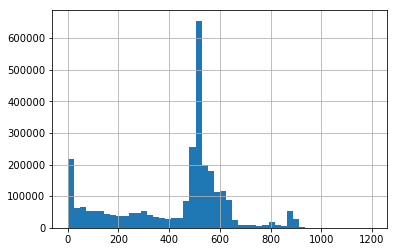

In [52]:
dfDebiet['Value'].hist(bins=50);

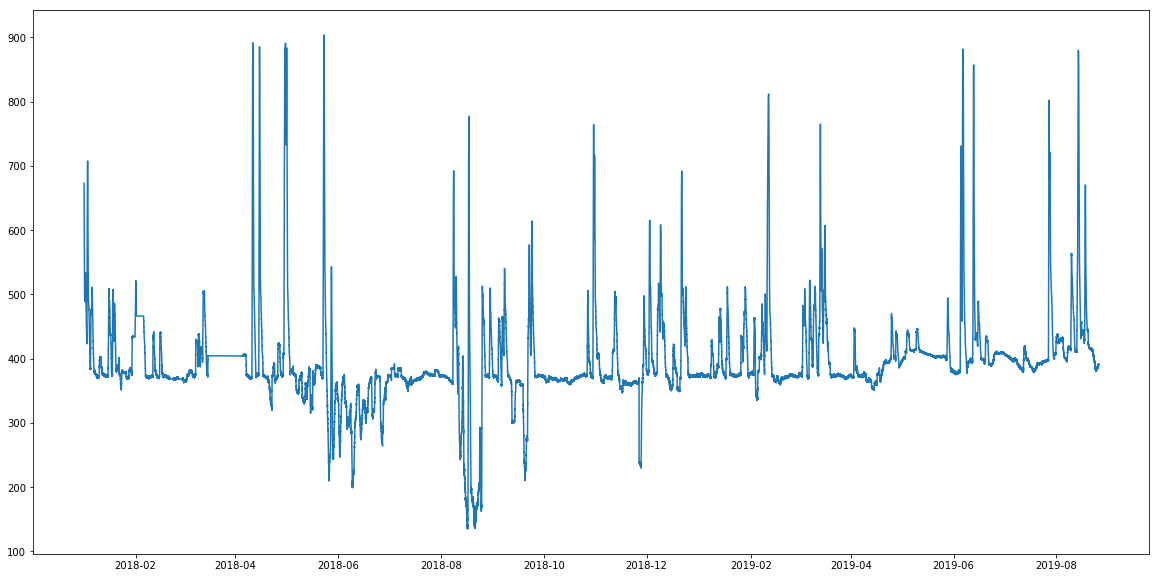

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfDebiet['TimeStamp'], dfDebiet['Value'].rolling(window=len(df)//(19*(365//12))).mean());

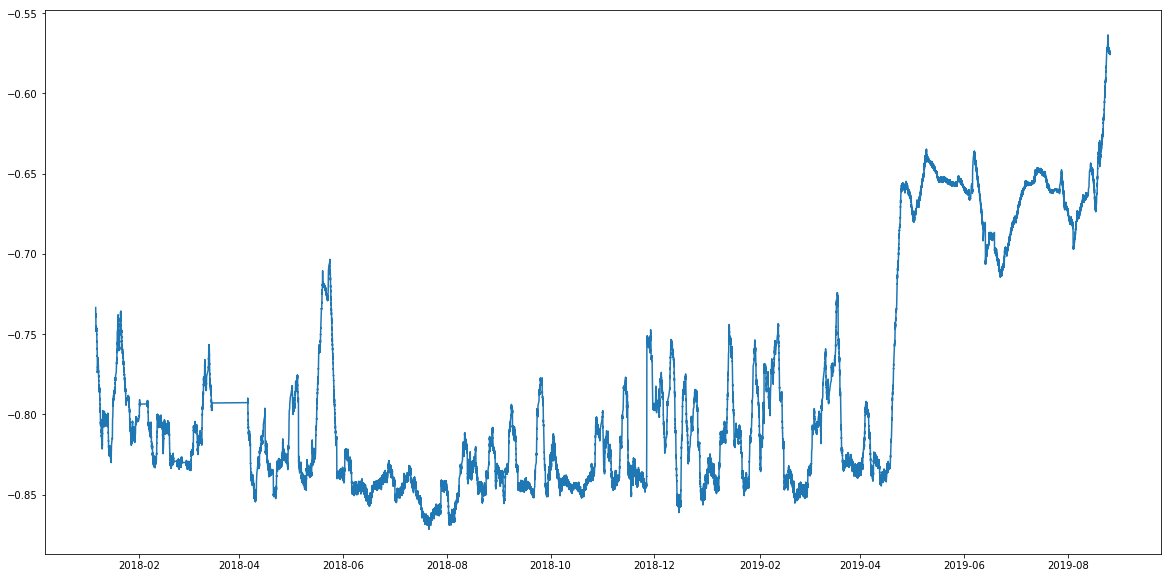

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfNiveau['TimeStamp'], dfNiveau['Value'].rolling(window=len(df)//(19*(365//12))).mean());